<a href="https://colab.research.google.com/github/LuisDLCP/MIneria-datos_Examen-final/blob/main/2)generacion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
root_path="./drive/MyDrive/Master_Program_CC/AprendizajeAutomatico/Examen_final/RawData/"
!ls {root_path}

data_original1_parte1.mp4  data_original1_parte2.mp4  data_segmentada
data_original1_parte1.wav  data_original1_parte2.wav


In [ ]:
import librosa, librosa.display
import soundfile as sf
import numpy as np
import pandas as pd
import os
from scipy.signal import argrelextrema
from scipy.fft import fft

## 1) Read wav files

In [ ]:
pathAudio = root_path + "data_segmentada/"
files = librosa.util.find_files(pathAudio, ext=['wav'], recurse=False)
files = sorted(np.asarray(files))
print(files[0])
print(files[-1])

/content/drive/MyDrive/Master_Program_CC/AprendizajeAutomatico/Examen_final/RawData/data_segmentada/data_original1_0001_s00.wav
/content/drive/MyDrive/Master_Program_CC/AprendizajeAutomatico/Examen_final/RawData/data_segmentada/data_original1_2142_s00.wav


In [ ]:
len(files)

2142

## 2) Generate the dataset

In [ ]:
media = []
media_absoluta = []
mediana = []
mediana_absoluta = []
std = []
varianza = []
kurtosis = []
skewness = []
cruce_cero = []
percentil0 = []
percentil1 = []
percentil2 = []
percentil3 = []
percentil4 = []
percentil5 = []
percentil6 = []
percentil7 = []
percentil8 = []
percentil9 = []
percentil10 = []
rms = []
spe = []
maxfreq = []

nombre_archivo = []
nombre_clase = []

for file in files:
    # First load the file
    segment, sr = librosa.load(file)
    
    # Then, we get the attributes (time domain)
    cruce_cero.append(sum(librosa.core.zero_crossings(segment)))
    rms.append(np.mean(librosa.feature.rms(y=segment)))
    media.append(np.mean(segment))
    mediana.append(np.median(segment))
    varianza.append(np.std(segment)**2)
    mediana_absoluta.append(np.mean(abs(segment)))
    media_absoluta.append(np.median(abs(segment)))
    std.append(np.std(segment))

    segment_df = pd.DataFrame(segment)
    skewness.append(segment_df.skew(axis=0).values[0])
    kurtosis.append(segment_df.kurt(axis=0).values[0])
    percentil0.append(segment_df.quantile(q=0.0, axis=0, numeric_only=True, interpolation='linear').values[0])
    percentil1.append(segment_df.quantile(q=0.1, axis=0, numeric_only=True, interpolation='linear').values[0])
    percentil2.append(segment_df.quantile(q=0.2, axis=0, numeric_only=True, interpolation='linear').values[0])
    percentil3.append(segment_df.quantile(q=0.3, axis=0, numeric_only=True, interpolation='linear').values[0])
    percentil4.append(segment_df.quantile(q=0.4, axis=0, numeric_only=True, interpolation='linear').values[0])
    percentil5.append(segment_df.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear').values[0])
    percentil6.append(segment_df.quantile(q=0.6, axis=0, numeric_only=True, interpolation='linear').values[0])
    percentil7.append(segment_df.quantile(q=0.7, axis=0, numeric_only=True, interpolation='linear').values[0])
    percentil8.append(segment_df.quantile(q=0.8, axis=0, numeric_only=True, interpolation='linear').values[0])
    percentil9.append(segment_df.quantile(q=0.9, axis=0, numeric_only=True, interpolation='linear').values[0])
    percentil10.append(segment_df.quantile(q=1.0, axis=0, numeric_only=True, interpolation='linear').values[0])

    # After that, we get other attributes (frequency domain)
    # a) Spectral energy
    #      Apply a FFT 
    y_fft = np.abs(fft(segment)) # magnitude 
    y_fft_aux = y_fft/max(y_fft) # Normalize between [0,1]
    #     Get the spectral energy 
    spe_value = np.mean(y_fft_aux)
    spe.append(spe_value)

    # b) Maximum peak frequency
    #      Select all peaks 
    m=argrelextrema(y_fft,np.greater, mode='wrap')
    yf_peaks = [y_fft[m] for i in m]
    #      Select the first 2 peaks 
    var_aux1=list(yf_peaks[0])
    indices_aux = sorted(var_aux1, reverse=True)[:4]
    if len(set(indices_aux))>2:
      indices_aux = sorted(list(set(indices_aux)),reverse=True)[:-1]
    else:
      indices_aux = sorted(list(set(indices_aux)),reverse=True)
    indices = [var_aux1.index(value) for value in indices_aux]
    x_peak=[list(m[0])[i] for i in indices]
    y_peak=indices_aux
    #       Select the max freq peak 
    if x_peak[y_peak.index(max(y_peak))]==0:
      if max(y_peak)/min(y_peak)>15:
        freq_value = x_peak[y_peak.index(max(y_peak))]
      else:
        freq_value = x_peak[y_peak.index(min(y_peak))]
    else:
      freq_value = x_peak[y_peak.index(max(y_peak))]
    
    maxfreq.append(freq_value)

    # id and class 
    nombre_archivo.append(os.path.basename(file))
    
    code = os.path.basename(file).split('_')[-1].split('.')[0]
    clase = int(code[-2:])
    nombre_clase.append(clase)

df = pd.DataFrame(list(zip(
    nombre_archivo,
    media,
    media_absoluta,
    mediana,
    mediana_absoluta,
    rms,
    std,
    varianza,
    kurtosis,
    skewness,
    cruce_cero,
    percentil0,
    percentil1,
    percentil2,
    percentil3,
    percentil4,
    percentil5,
    percentil6,
    percentil7,
    percentil8,
    percentil9,
    percentil10,
    spe,
    maxfreq,
    nombre_clase
    )),
    columns =[
        'id',
        'media',
        'media_absoluta',
        'mediana',
        'mediana_absoluta',
        'rms',
        'std',
        'varianza',
        'kurtosis',
        'skewness',
        'cruce_cero',
        'percentil0',
        'percentil1',
        'percentil2',
        'percentil3',
        'percentil4',
        'percentil5',
        'percentil6',
        'percentil7',
        'percentil8',
        'percentil9',
        'percentil10',
        'energia_spect',
        'max_frec',
        'clase'
        ])
df.head()

,id,media,media_absoluta,mediana,mediana_absoluta,rms,std,varianza,kurtosis,skewness,cruce_cero,percentil0,percentil1,percentil2,percentil3,percentil4,percentil5,percentil6,percentil7,percentil8,percentil9,percentil10,energia_spect,max_frec,clase
0,data_original1_0001_s00.wav,-0.000830,0.024475,-0.000824,0.054316,0.071308,0.087267,0.007616,3.306944,0.492705,26317,-0.491669,-0.102145,-0.050201,-0.017517,-0.004242,-0.000824,0.002014,0.007538,0.035339,0.102325,0.612396,0.021406,2944,0
1,data_original1_0002_s00.wav,-0.000550,0.028992,-0.000671,0.055377,0.071874,0.085361,0.007287,2.410013,0.410182,23520,-0.415405,-0.103485,-0.053528,-0.019958,-0.004883,-0.000671,0.002625,0.011230,0.042328,0.104309,0.546204,0.019570,3679,0
2,data_original1_0003_s00.wav,0.002821,0.052185,0.000397,0.083982,0.106171,0.127086,0.016151,2.457605,-0.337466,22655,-0.841522,-0.137177,-0.069427,-0.025208,-0.004303,0.000397,0.006348,0.034973,0.086096,0.156921,0.689453,0.017571,5124,0
3,data_original1_0004_s00.wav,0.002699,0.062958,0.001434,0.091461,0.116961,0.133240,0.017753,2.330213,-0.423787,26064,-0.847504,-0.158325,-0.079315,-0.029144,-0.003876,0.001434,0.015503,0.051422,0.095306,0.156189,0.673950,0.028427,4346,0
4,data_original1_0005_s00.wav,-0.000354,0.062561,-0.000275,0.092237,0.118884,0.132588,0.017579,2.085448,-0.001486,25055,-0.817627,-0.157715,-0.087189,-0.043182,-0.013062,-0.000275,0.011658,0.041962,0.086700,0.157654,0.860596,0.022101,4561,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2142 non-null   object 
 1   media             2142 non-null   float64
 2   media_absoluta    2142 non-null   float64
 3   mediana           2142 non-null   float64
 4   mediana_absoluta  2142 non-null   float64
 5   rms               2142 non-null   float64
 6   std               2142 non-null   float64
 7   varianza          2142 non-null   float64
 8   kurtosis          2142 non-null   float64
 9   skewness          2142 non-null   float64
 10  cruce_cero        2142 non-null   int64  
 11  percentil0        2142 non-null   float64
 12  percentil1        2142 non-null   float64
 13  percentil2        2142 non-null   float64
 14  percentil3        2142 non-null   float64
 15  percentil4        2142 non-null   float64
 16  percentil5        2142 non-null   float64


In [ ]:
# Save as excel 
dataset_path="./drive/MyDrive/Master_Program_CC/AprendizajeAutomatico/Examen_final/Dataset/"
df.to_excel(dataset_path + 'Dataset.xlsx', index=False)
df.to_csv(dataset_path + 'Dataset.csv')

## ANEXOS 

### 1) Graficas de la FFT

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.fft import fft
from scipy.signal import argrelextrema

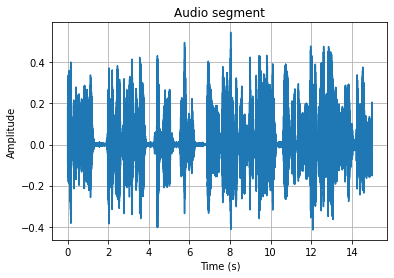

In [ ]:
x=np.linspace(0,15,len(segment))
plt.plot(x,segment)
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.title("Audio segment")
plt.grid()

In [ ]:
# FFT
y_fft = np.abs(fft(segment)) # magnitude

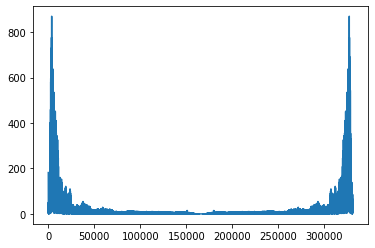

In [ ]:
plt.plot(y_fft)

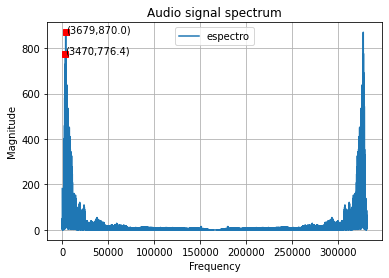

In [ ]:
yf = fft(segment)
# Select all peaks 
m=argrelextrema(np.abs(yf),np.greater, mode='wrap')
yf_peaks = [np.abs(yf)[m] for i in m]
# Select the first 2 peaks 
var_aux1=list(yf_peaks[0])
indices_aux = sorted(var_aux1, reverse=True)[:4]
if len(set(indices_aux))>2:
  indices_aux = sorted(list(set(indices_aux)),reverse=True)[:-1]
else:
  indices_aux = sorted(list(set(indices_aux)),reverse=True)
indices = [var_aux1.index(value) for value in indices_aux]
x_peak=[list(m[0])[i] for i in indices]
y_peak=indices_aux

fig,ax=plt.subplots()
plt.plot(np.abs(yf),label='espectro')
plt.plot(x_peak,y_peak,'rs')
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Audio signal spectrum")
for i in range(len(x_peak)):
  ax.annotate(f"({round(x_peak[i],1)},{round(y_peak[i],1):.1f})",xy=(x_peak[i],y_peak[i]),xycoords='data')
plt.legend()
plt.grid()
plt.savefig("fig_fft.png", bbox_inches='tight', fancybox=True, shadow=True)